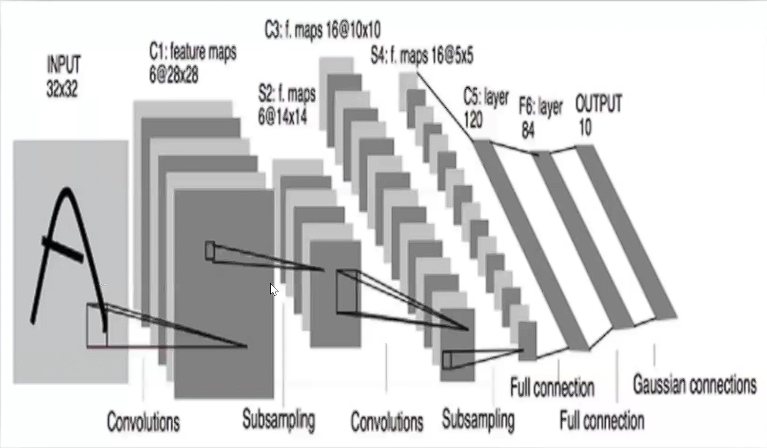

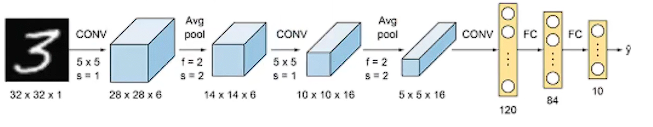

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import Sequential

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
model = Sequential()
#conv layer1
model.add(Conv2D(6, kernel_size = (5,5), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
#Conv layer 2
model.add(Conv2D(16, kernel_size = (5,5), strides = 1, padding = 'valid', activation = 'relu'))
#Pooling layer
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
#Flatten
model.add(Flatten())
# 1st fully connected layer
model.add(Dense(120, activation = 'relu'))
# 2nd fully connected layer
model.add(Dense(84, activation = 'relu'))
#output layer
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# This  is the LeNet Architecture

In [ ]:
model.compile(optimizer = 'adam',
              loss = keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 5, batch_size = 64, validation_data = (x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.8271 - loss: 0.5575 - val_accuracy: 0.9781 - val_loss: 0.0716
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9771 - loss: 0.0738 - val_accuracy: 0.9848 - val_loss: 0.0470
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9840 - loss: 0.0512 - val_accuracy: 0.9845 - val_loss: 0.0461
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9886 - loss: 0.0374 - val_accuracy: 0.9879 - val_loss: 0.0358
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9902 - loss: 0.0310 - val_accuracy: 0.9882 - val_loss: 0.0386


In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9851 - loss: 0.0457


[0.0385616160929203, 0.9882000088691711]

In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
y_pred[:5]

array([[1.10883169e-08, 9.16117138e-09, 4.61899567e-08, 1.14684866e-07,
        9.80335813e-09, 2.09286153e-08, 6.60525246e-10, 9.99999464e-01,
        1.47622188e-07, 1.32948500e-07],
       [2.55657238e-08, 3.33947514e-06, 9.99996603e-01, 2.11204554e-10,
        1.93549812e-11, 1.02632331e-14, 6.20785715e-11, 3.86600867e-08,
        1.38510603e-09, 6.30899887e-14],
       [3.12394445e-06, 9.99586523e-01, 2.86564568e-06, 1.97306544e-08,
        3.77708318e-04, 8.03717285e-07, 1.58495527e-06, 2.23129355e-05,
        2.18979085e-06, 2.99131989e-06],
       [9.99863148e-01, 3.87385679e-11, 1.85190444e-07, 9.34518809e-08,
        1.01752853e-07, 5.36143574e-08, 1.33562906e-04, 5.21663935e-07,
        5.41875863e-07, 1.73609760e-06],
       [1.06042544e-08, 2.65524114e-09, 1.88259307e-07, 1.99788808e-09,
        9.99973714e-01, 1.13325020e-08, 2.79139499e-07, 1.93615918e-07,
        5.04907121e-07, 2.50079011e-05]], dtype=float32)

In [ ]:
import numpy as np
y_pred_1 = [np.argmax(y) for y in y_pred]

In [ ]:
y_pred_1[:5]

[7, 2, 1, 0, 4]

In [ ]:
import numpy as np
y_test_1 = [np.argmax(y) for y in y_test]

In [ ]:
y_test_1[:5]

[7, 2, 1, 0, 4]

In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [26]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
x_train = x_train/255.0
x_test = x_test/255.0


In [35]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [28]:
model = Sequential()
model.add(Conv2D(6, kernel_size = (5,5), strides = 1, padding = 'valid', activation = 'relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(Conv2D(16, kernel_size = (5,5), strides = 1, padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(84, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          51,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,836 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,886 (257.37 KB)

 Trainable params: 65,886 (257.37 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer = 'adam',
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

In [38]:
history = model.fit(x_train, y_train, epochs = 5, batch_size = 64, validation_data = (x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.6056 - loss: 1.1092 - val_accuracy: 0.5909 - val_loss: 1.1613
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.6276 - loss: 1.0563 - val_accuracy: 0.5991 - val_loss: 1.1261
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.6441 - loss: 1.0057 - val_accuracy: 0.5903 - val_loss: 1.1535
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.6580 - loss: 0.9660 - val_accuracy: 0.5951 - val_loss: 1.1775
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.6710 - loss: 0.9333 - val_accuracy: 0.6130 - val_loss: 1.1033
